In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, font_manager

In [2]:
#default plotting parameters
pad = 5
xpad = 15
ypad = 11

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '-'
plt.rcParams['figure.figsize'] = 8.5,11

plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titleweight'] = 'bold'

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '16'

color = 'black'
alpha = 0.2
markersize = 60
capsize = 8
elinewidth = 4
lw = 4
barwidth = 0.5

In [3]:
#for use with replicates
def myplot(DF,ax=None, color=None, **kwargs):
    m = DF.mean(1).to_numpy()
    s = DF.std(1).to_numpy()
    t = DF.index.values
    if ax:
        ax.plot(t,m, color= color, **kwargs)
        ax.fill_between(t, m-s, m+s, alpha = 0.1, color = color)
    else:
        plt.plot(t,m, color= color, **kwargs)
        plt.fill_between(t, m-s, m+s, alpha = 0.1, color = color)
        
#for use with mean, std
def myplot_new(DF_mean, DF_std, ax=None, color=None, **kwargs):

    t = DF_mean.index.values
    if ax:
        ax.plot(t,DF_mean, color= color, **kwargs)
        #ax.fill_between(t, DF_mean-DF_std, DF_mean+DF_std, alpha = 0.1, color = color)
    else:
        plt.plot(t,DF_mean, color= color, **kwargs)
        #plt.fill_between(t, DF_mean-DF_std, DF_mean+DF_std, alpha = 0.1, color = color)

In [4]:
palette_1 = ['#00429d', '#4771b2', '#73a2c6', '#a5d5d8', '#ffffe0', '#ffbcaf', '#f4777f', '#cf3759', '#93003a']
palette_2 = ['#004ace', '#6755b9', '#8e63a8', '#ab729b', '#c38195', '#da9098', '#ef9fa9', '#ffaed8']
palette_venasaur = ['#105241', '#ff7b73', '#5a9c39', '#5ad5c5', '#de4141', '#ffbdbd']

## Read in data

In [19]:
data = 'szp-bl/220525-SZP-BL-Pulse_all.csv'
layout = 'szp-bl/220525-SZP_BL-Pulse_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str, nrows = 9) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx = pd.read_csv(data, skiprows = 68, nrows = 39,na_values = 'OVRFLW', encoding='ISO-8859-1' ) # reads raw data file at specified rows


RFPEx.index = RFPEx.index*30

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(str(i[0]) + i[1])
            
exps # print dictionary to check 

{'zero_a': ['A1', 'B1', 'C1'],
 'med_a': ['A2', 'B2', 'C2'],
 'high_a': ['A3', 'B3', 'C3'],
 'zero_d': ['A6', 'B6', 'C6'],
 'med_d': ['A7', 'B7', 'C7'],
 'high_d': ['A8', 'B8', 'C8'],
 'zero_1': ['A10', 'B10', 'C10'],
 'med_1': ['A11', 'B11', 'C11'],
 'high_1': ['A12', 'B12', 'C12'],
 'blank': ['D1', 'D2', 'D3'],
 'zero_2': ['F1', 'G1', 'H1'],
 'med_2': ['F2', 'G2', 'H2'],
 'high_2': ['F3', 'G3', 'H3'],
 'zero_3': ['F6', 'G6', 'H6'],
 'med_3': ['F7', 'G7', 'H7'],
 'high_3': ['F8', 'G8', 'H8'],
 'zero_4': ['F10', 'G10', 'H10'],
 'med_4': ['F11', 'G11', 'H11'],
 'high_4': ['F12', 'G12', 'H12']}

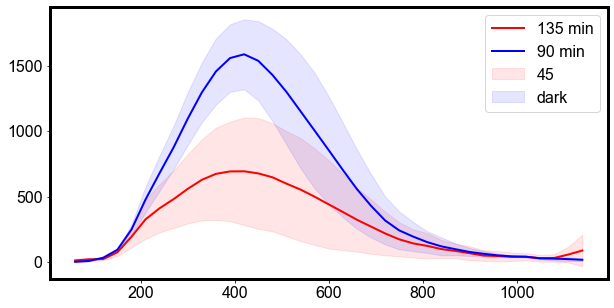

In [141]:
plt.figure(figsize = (10,5))
# plt.plot(RFPEx[exps['high_4']],label='180', color = 'k')
# plt.plot(RFPEx[exps['high_3']],label='135', color = 'g')
myplot(RFPEx[exps['med_3']].diff(2), color = 'r')
myplot(RFPEx[exps['med_2']].diff(2), color = 'b')
#myplot(RFPEx[exps['med_1']].diff(2), color = 'k')

plt.legend(['135 min','90 min','45','dark'])
# plt.xlim([50,600])
#plt.ylim([0,2])

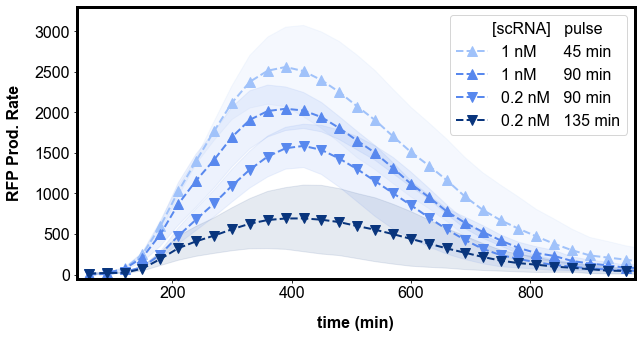

In [231]:
plt.figure(figsize = (10,5))
# myplot(RFPEx[exps['high_4']].diff(2), color = 'b')
# myplot(RFPEx[exps['high_3']].diff(2), color = 'k')
myplot(RFPEx[exps['high_1']].diff(2), color = '#a0c2fa', linestyle = '--',marker = '^', markersize = 10, label = '1 nM      45 min')
myplot(RFPEx[exps['high_2']].diff(2), color = '#5888ee', linestyle = '--',marker = '^',markersize = 10, label = '1 nM      90 min')

myplot(RFPEx[exps['med_2']].diff(2), color = '#5888ee', linestyle = '--',marker = 'v',markersize = 10, label = '0.2 nM   90 min')
myplot(RFPEx[exps['med_3']].diff(2), color = '#09357d', linestyle = '--', marker = 'v',markersize = 10, label = '0.2 nM   135 min')

plt.xlim([40,975])
plt.ylim([-50,3300])
plt.legend(title = '    [scRNA]   pulse')
plt.ylabel('RFP Prod. Rate', labelpad = ypad*1.1)
plt.xlabel('time (min)', labelpad = xpad)

plt.savefig('pulse.svg')

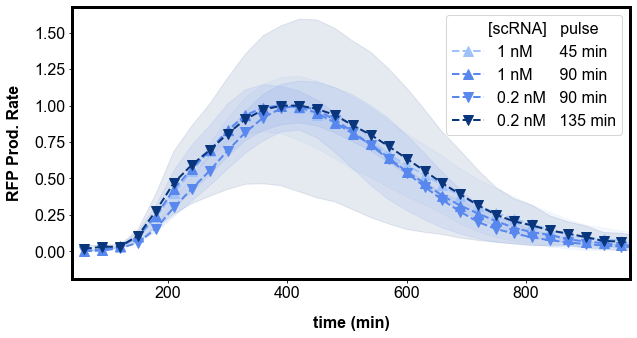

In [243]:
plt.figure(figsize = (10,5))
# myplot(RFPEx[exps['high_4']].diff(2), color = 'b')
# myplot(RFPEx[exps['high_3']].diff(2), color = 'k')
myplot(RFPEx[exps['high_1']].diff(2), color = '#a0c2fa', linestyle = '--',marker = '^', markersize = 10, label = '1 nM      45 min')
myplot(RFPEx[exps['high_2']].diff(2), color = '#5888ee', linestyle = '--',marker = '^',markersize = 10, label = '1 nM      90 min')

myplot(RFPEx[exps['med_2']].diff(2), color = '#5888ee', linestyle = '--',marker = 'v',markersize = 10, label = '0.2 nM   90 min')
myplot(RFPEx[exps['med_3']].diff(2), color = '#09357d', linestyle = '--', marker = 'v',markersize = 10, label = '0.2 nM   135 min')

plt.xlim([40,975])
plt.ylim([-50,3300])
plt.legend(title = '    [scRNA]   pulse')
plt.ylabel('RFP Prod. Rate', labelpad = ypad*1.1)
plt.xlabel('time (min)', labelpad = xpad)

plt.savefig('pulse.svg')

(0.0, 2.0)

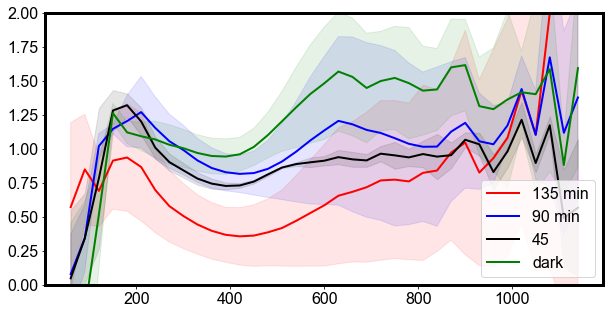

In [128]:
plt.figure(figsize = (10,5))
# plt.plot(RFPEx[exps['high_4']],label='180', color = 'k')
# plt.plot(RFPEx[exps['high_3']],label='135', color = 'g')
myplot(RFPEx[exps['med_3']].diff(2).div(RFPEx[exps['med_a']].diff(2).mean(1),axis=0), color = 'r')
myplot(RFPEx[exps['med_2']].diff(2).div(RFPEx[exps['med_a']].diff(2).mean(1),axis=0), color = 'b')
myplot(RFPEx[exps['med_1']].diff(2).div(RFPEx[exps['med_a']].diff(2).mean(1),axis=0), color = 'k')
myplot(RFPEx[exps['med_d']].diff(2).div(RFPEx[exps['med_a']].diff(2).mean(1),axis=0), color = 'g')

plt.legend(['135 min','90 min','45','dark'])
# plt.xlim([50,600])
plt.ylim([0,2])

## Background Subtractions

In [14]:
def backgroundSubtractKinetic(Exp, Blank):
    return RFPEx[exps[Exp]].mean(axis = 1) - RFPEx[exps[Blank]].mean(axis = 1)

#Calculate propagation of error for background subtractions
def backgroundSubtractKineticErr(Exp,Blank):
    return np.sqrt(RFPEx[exps[Exp]].std(axis = 1)**2 + RFPEx[exps[Blank]].std(axis = 1)**2)


In [16]:
# Strategy 1: Unique background subtractions for each condition
conditions = {'_a':'no CRISPRi', '_d':'dark', '_1':'45 min', '_2':'90 min', '_3':'135 min', '_4':'180 min'}

# Create dictionaries to hold kinetic RFP and error values
rfp = {}
err = {}

for cond in conditions:
    rxns = [exp for exp in exps if cond in exp] # Extracts all matching reactions, e.g. all 'A's, all 'B's, etc.
    rfp[cond] = pd.DataFrame(columns = rxns[:-1]) # Create dictionary of dataframes 
    err[cond] = pd.DataFrame(columns = rxns[:-1])
    for exp in rxns[:-1]:
        rfp[cond][exp] = backgroundSubtractKinetic(exp, rxns[-1])
        err[cond][exp] = backgroundSubtractKineticErr(exp, rxns[-1])
        
        rfp[cond][exp] = (rfp[cond][exp] - rfp[cond][exp].iloc[4])
    for exp in rxns[:-1][::-1]:
        rfp[cond][exp] =  rfp[cond][exp].div(rfp[cond][cond+'-0'])
        err[cond][exp] = err[cond][exp].div(rfp[cond][exp].max())*0


KeyError: '_a-0'

## Kinetics

Text(0.5, 0.06, 'Time (min)')

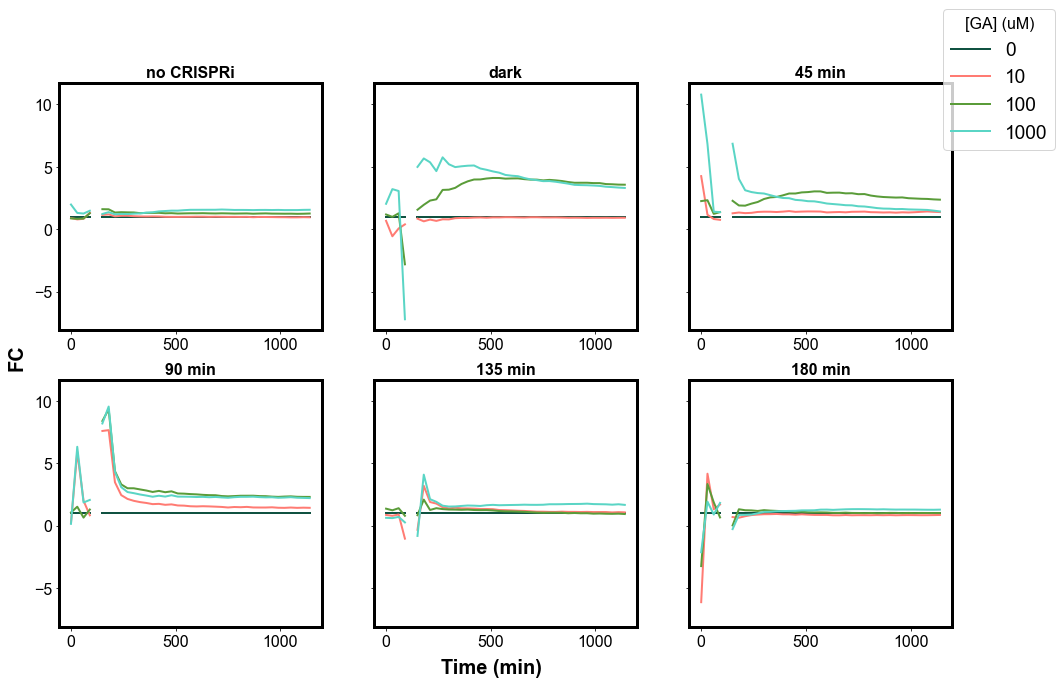

In [270]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10), sharey=True)
row = 0
col = -1
labels = ['0', '10', '100', '1000']

for cond in conditions:
    col+=1
    if col > 2:
        row += 1
        col = 0
    for idx,exp in enumerate(rfp[cond].columns):         
        myplot_new(rfp[cond][exp], 0, ax = axs[row,col], label = labels[idx], color = palette_venasaur[idx])
        #axs[row,col].legend()
        axs[row,col].set_title(conditions[cond], fontsize = 16)
fig.legend(labels = labels, fontsize = 'large', title = '[GA] (uM)')
fig.text(0.08, 0.5, 'FC', va='center', rotation='vertical', weight = 'bold', fontsize = 20)
fig.text(0.5, 0.06, 'Time (min)', ha='center', weight = 'bold', fontsize = 20)

## Production Rates

In [203]:
npr = {} #normalized production rate
npr_err = {}

for cond in conditions:
    rxns = [exp for exp in exps if cond in exp] # Extracts all matching reactions, e.g. all 'A's, all 'B's, etc.
    npr[cond] = pd.DataFrame(columns = rxns) # Create dictionary of dataframes
    npr_err[cond] = pd.DataFrame(columns = rxns)
    
    npr[cond] = rfp[cond].diff(5).div(rfp[cond][rxns[0]].diff(5), axis=0) # Calculate normalized production rate 
                                                                        #(normalized by rxns[0] which is no GA)
    
    #Calculate propagation of uncertainty 
    A_term = (err[cond].diff(5)/rfp[cond].diff(3))**2                   
    B_term = (err[cond][rxns[0]].diff(5)/rfp[cond][rxns[0]].diff(5))**2
    npr_err[cond] = npr[cond]*np.sqrt(A_term.add(B_term, axis = 0))

Text(0.5, 0.06, 'Time (min)')

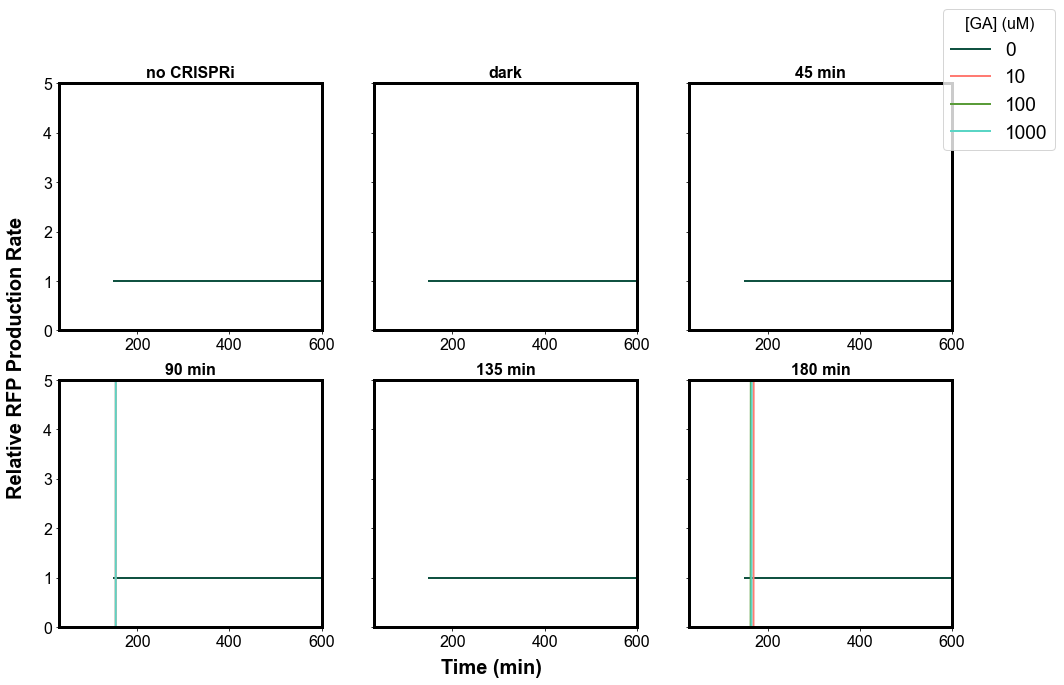

In [204]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10), sharey = True)
row = 0
col = -1
labels = ['0', '10', '100', '1000']

for cond in conditions:
    col+=1
    if col > 2:
        row += 1
        col = 0
    for idx,exp in enumerate(rfp[cond].columns):         
        myplot_new(npr[cond][exp], npr_err[cond][exp], ax = axs[row,col], label = labels[idx], color = palette_venasaur[idx])
        #axs[row,col].legend()
        axs[row,col].set_title(conditions[cond], fontsize = 16)
        axs[row,col].set_ylim(-0,5)
        axs[row,col].set_xlim(30,600)
        
fig.legend(labels = labels, fontsize = 'large', title = '[GA] (uM)')
fig.text(0.08, 0.5, 'Relative RFP Production Rate', va='center', rotation='vertical', weight = 'bold', fontsize = 20)
fig.text(0.5, 0.06, 'Time (min)', ha='center', weight = 'bold', fontsize = 20)

In [198]:
cond

'F'

In [170]:
conditions

{'A': 'no CRISPRi',
 'B': 'dark',
 'C': '45 min',
 'D': '90 min',
 'E': '135 min',
 'F': '180 min'}

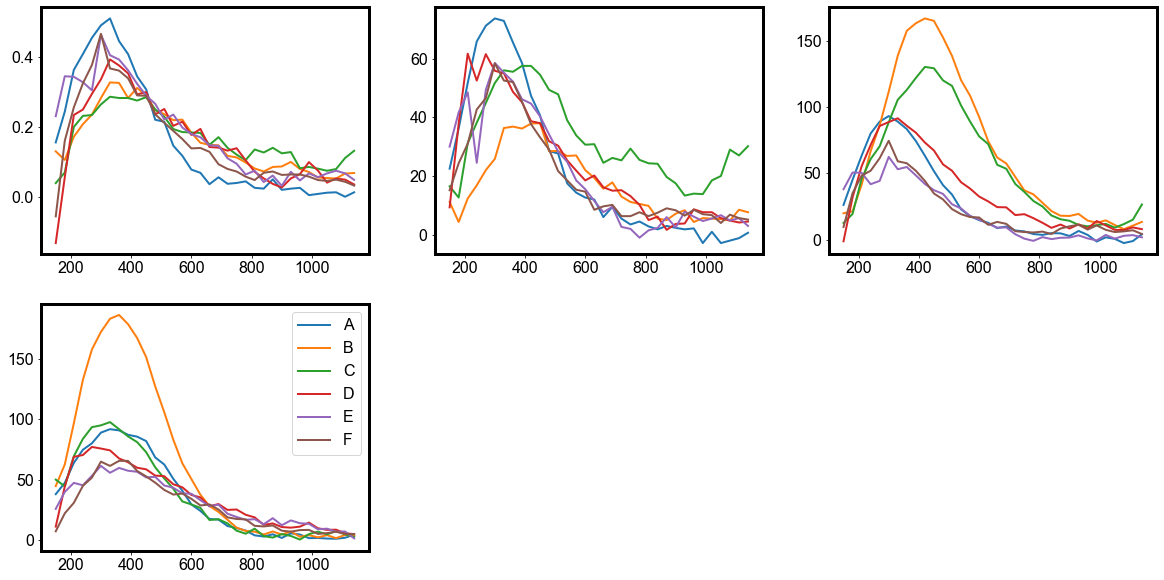

In [205]:
plt.figure(figsize=(20,10))
conditions_2 = ['-0.','-10.','-100.','-1000.']
for i,c2 in enumerate(conditions_2):
    plt.subplot(2,3,i+1)
    for k,c in enumerate(conditions):
        rxns = [exp for exp in exps if c2 in exp] # Extracts all matching reactions, e.g. all 'A's, all 'B's, etc.
        
        for r in rxns:
            if c in r:
                plt.plot(rfp[c][r].diff(5), label = c)

    
    #plt.ylim([0,190])
plt.legend()

In [119]:
conditions

{'A': 'no CRISPRi',
 'B': 'dark',
 'C': '45 min',
 'D': '90 min',
 'E': '135 min',
 'F': '180 min'}

In [ ]:
plt.figure(figsize=(20,10))
for i,c in enumerate(conditions):
    rxns = [exp for exp in exps if c in exp] # Extracts all matching reactions, e.g. all 'A's, all 'B's, etc.

    plt.subplot(2,3,i+1)
    plt.plot(rfp[c].diff(5).div(rfp[c][rxns[0]].diff(5), axis=0))
    plt.ylim([0,10])
    plt.xlim([0,800])